# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

### Start my work

In [1]:
# initial imports for backend and scripting layer.
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend() # this backend is very important to be able to access objects
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
#will probably need numpy
import numpy as np # matplotlib is really based on np arrays
import pandas as pd
from random import randint # if you want some random numbers
from datetime import datetime



raw = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')


trans = raw.copy()
trans['Date'] = pd.to_datetime(trans['Date'])
#convert temperature data from tenths of a degree to whole degrees
trans['Data_Value'] = trans['Data_Value']/10
# create date
trans['Month_day'] = trans['Date'].dt.strftime('%m-%d')


#create 4 data sets 05 to 14 max/min & 15 max/min
mask_max5_14 = (trans['Date'] >= '2005-01-01') & (trans['Date'] <= '2014-12-31') & \
        (trans['Month_day'] != '02-29') & (trans['Element'] == 'TMAX')
mask_min5_14 = (trans['Date'] >= '2005-01-01') & (trans['Date'] <= '2014-12-31') & \
        (trans['Month_day'] != '02-29') & (trans['Element'] == 'TMIN')
trans5_14mx = trans.loc[mask_max5_14]
trans5_14mn = trans.loc[mask_min5_14]
#groupby sets index to grouping column
trans5_14mx = trans5_14mx.groupby(['Month_day']).agg({'Data_Value':np.max}).rename(columns={'Data_Value': 'Max Temp'})
trans5_14mn = trans5_14mn.groupby(['Month_day']).agg({'Data_Value':np.min}).rename(columns={'Data_Value': 'Min Temp'})

mask15_mx = (trans['Date'] >='2015-01-01') & (trans['Date'] <= '2015-12-31') & \
        (trans['Month_day'] != '2015-02-29') & (trans['Element'] == 'TMAX')
mask15_mn = (trans['Date']>='2015-01-01') & (trans['Date'] <= '2015-12-31') & \
        (trans['Month_day'] != '2015-02-29') & (trans['Element'] == 'TMIN')
trans15_mx = trans.loc[mask15_mx]
trans15_mn = trans.loc[mask15_mn]
trans15_mx = trans15_mx.groupby(['Month_day']).agg({'Data_Value':np.max}).rename(columns={'Data_Value': 'Max Temp 2015'})
trans15_mn = trans15_mn.groupby(['Month_day']).agg({'Data_Value': np.min}).rename(columns={'Data_Value': 'Min Temp 2015'})

df = trans5_14mx.join(trans5_14mn, how = 'inner')
df_2015 = trans15_mx.join(trans15_mn, how = 'inner')
df = df.join(df_2015, how = 'inner')

print('trans head \n', trans.head())
print('\n trans describe \n', trans.describe())
print('trans5_14mx head \n', trans5_14mx.head())
print('\n trans5_14mx describe \n', trans5_14mx.describe())
print('trans5_14mn head \n', trans5_14mn.head())
print('\n trans5_14mn describe \n', trans5_14mn.describe())
print('trans15_mx head \n', trans15_mx.head())
print('\n trans15_mx describe \n', trans15_mx.describe())
print('trans15_mn head \n', trans15_mn.head())
print('\n trans5_14mn describe \n', trans15_mn.describe())

# smsk = (trans['Month_day'] == '01-01')
# s = trans.loc[smsk]
# s

trans head 
             ID       Date Element  Data_Value Month_day
0  USW00094889 2014-11-12    TMAX         2.2     11-12
1  USC00208972 2009-04-29    TMIN         5.6     04-29
2  USC00200032 2008-05-26    TMAX        27.8     05-26
3  USC00205563 2005-11-11    TMAX        13.9     11-11
4  USC00200230 2014-02-27    TMAX       -10.6     02-27

 trans describe 
           Data_Value
count  165085.000000
mean        9.542212
std        12.351513
min       -34.300000
25%         0.000000
50%         9.400000
75%        18.900000
max        40.600000
trans5_14mx head 
            Max Temp
Month_day          
01-01          15.6
01-02          13.9
01-03          13.3
01-04          10.6
01-05          12.8

 trans5_14mx describe 
          Max Temp
count  365.000000
mean    25.864932
std      9.022784
min      6.700000
25%     18.300000
50%     27.800000
75%     33.300000
max     40.600000
trans5_14mn head 
            Min Temp
Month_day          
01-01         -16.0
01-02         -26.

In [2]:
# filter for 2015 max temps > max for '05 to '14 & 2015 min temps < '05 to '14 min temps
mask = (df['Max Temp 2015'] > df['Max Temp'])
df_mx = df.loc[mask]
df_mx = df_mx.drop(['Max Temp', 'Min Temp', 'Min Temp 2015'], axis = 1)
# But, changes will show if run code at this point
mask = (df['Min Temp 2015'] < df['Min Temp'])
df_min = df.loc[mask]
df_min = df_min.drop(['Max Temp', 'Min Temp', 'Max Temp 2015'], axis = 1)

df_2015 = df_mx.join(df_min, how = 'outer')
df = df.drop(['Max Temp 2015', 'Min Temp 2015'], axis = 1)
df = df.join(df_2015, how = 'outer')
df.head()

Max Temp  Min Temp  Max Temp 2015  Min Temp 2015
Month_day                                                  
01-01          15.6     -16.0            NaN            NaN
01-02          13.9     -26.7            NaN            NaN
01-03          13.3     -26.7            NaN            NaN
01-04          10.6     -26.1            NaN            NaN
01-05          12.8     -15.0            NaN          -15.5

<IPython.core.display.Javascript object>


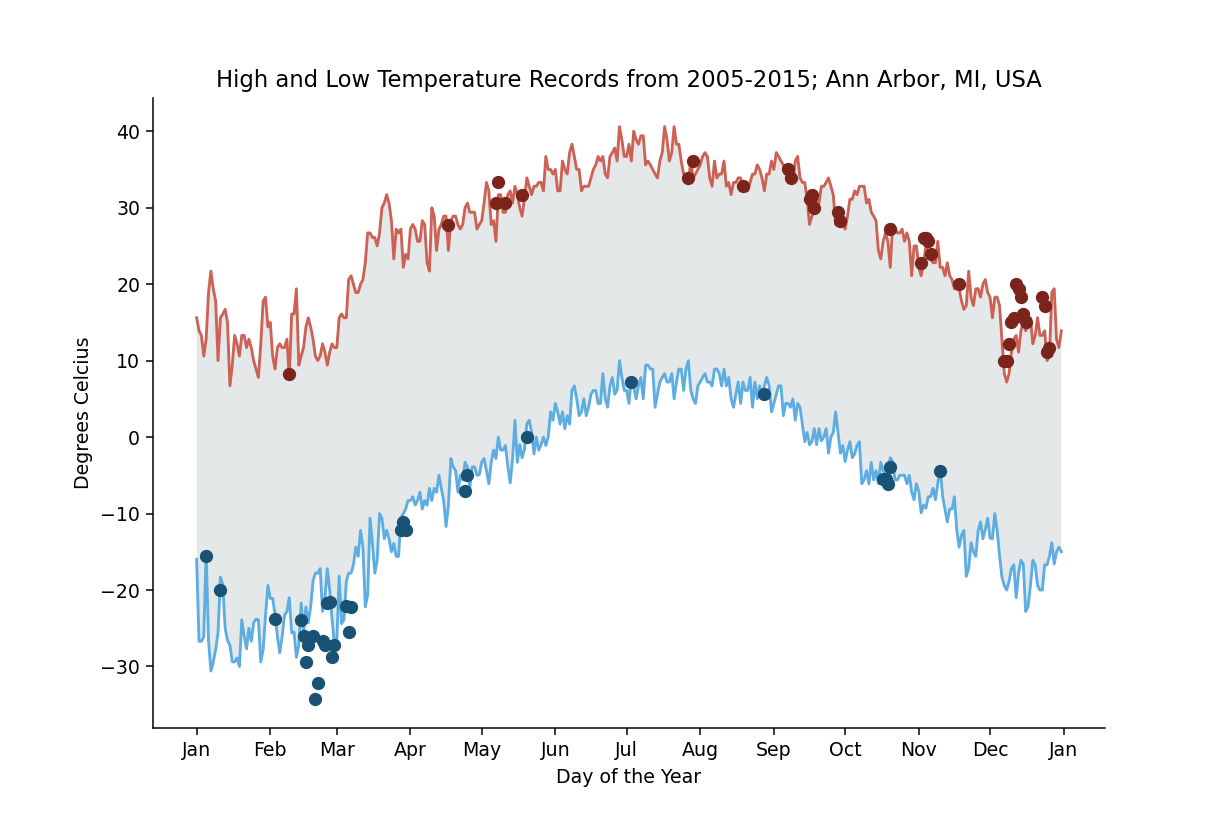

In [3]:
plt.figure(figsize=(9,6))

xvals = df.index.tolist()
#loop to convert Month_day index to date time
xvals = [datetime.strptime(x, '%m-%d').date() for x in xvals]
ax = plt.gcf().gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

## You can set tick marks to anything you want ....
# #set spacing of tick labels relative to dataframe axis i.e. 365/12 = ~30
# ax.get_xaxis().set_ticks([1, 31, 61, 92, 123, 154, 184, 214, 244, 274, 304, 334])
# # set x tik labels
# Xtk = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# ax.set_xticklabels(Xtk)

#zorder shows which is in the front or in the back
plt.scatter(xvals, df['Max Temp 2015'], color = '#7B241C', zorder = 3, label = "2015 High Temperature Record")
plt.scatter(xvals, df['Min Temp 2015'], color = '#1A5276', zorder = 3, label = '2015 Low Temperature Record')
plt.plot(xvals, df['Max Temp'], color='#CD6155', zorder=2, label="High Temperature 2005-2014")
plt.plot(xvals, df['Min Temp'], color='#5DADE2', zorder = 2, label = 'Low Temerature 2005-2014')
plt.xlabel('Day of the Year')
plt.ylabel('Degrees Celcius')
plt.title('High and Low Temperature Records from 2005-2015; Ann Arbor, MI, USA')
plt.gca().fill_between(xvals, df['Max Temp'], df['Min Temp'], facecolor='#95A5A6', alpha=0.25, zorder=1)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
plt.savefig('Temperature.png', bbox_inches='tight')
plt.show()